In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

In [7]:
# powers of mersenne primes (under 1 million)
powers = [2,3,5,7,13,19,31,61,89,107,127,521,607,1279,2203,2281,3217,4253,4423,9689,9941,11213,19937,21701,23209,44497,86243,110503,132049,216091,756839,859433]

In [8]:
len(powers)

32

In [9]:
rank = list(range(1,33))

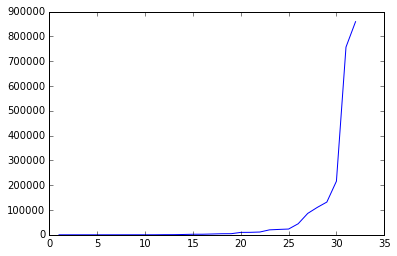

In [10]:
plt.plot(rank, powers)

In [11]:
import math
e_to_the_x = [math.e**x for x in rank]

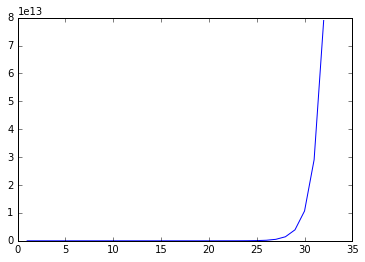

In [12]:
plt.plot(rank, e_to_the_x)

In [13]:
smaller_powers = [2,3,5,7,13,19,31,61,89,107,127,521,607,1279]

In [14]:
mr_primes = [((2**x) - 1) for x in smaller_powers]

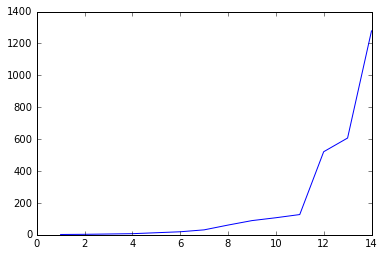

In [15]:
plt.plot(list(range(1,len(smaller_powers)+1)),smaller_powers)

In [16]:
# From RSA
def isprime(x):
        for i in list(range(2, int(x-1))):
            if x % i == 0:
                return False
        else:
            return True

In [17]:
[isprime(x) for x in powers]

[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [34]:
import pandas as pd
import numpy as np

In [19]:
df = pd.DataFrame()

In [57]:
df['mr_prime_rank'] = rank
df['mr_prime_power'] = powers
df['mr_prime_power_is_prime'] = [isprime(x) for x in powers]
df['mr_prime_power_prime_rank'] = [primes.index(x)+1 for x in powers]
df['mr_prime_power_prime_rank_pnt'] = [(x/np.log(x)) for x in powers]
df['mr_prime_power_prime_distance'] = np.insert(0,0,np.diff(powers))

In [58]:
df

,mr_prime_rank,mr_prime_power,mr_prime_power_is_prime,mr_prime_power_prime_rank,mr_prime_power_prime_rank_pnt,mr_prime_power_prime_distance
0,1,2,True,1,2.885390,1
1,2,3,True,2,2.730718,2
2,3,5,True,3,3.106675,2
3,4,7,True,4,3.597288,6
4,5,13,True,6,5.068326,6
5,6,19,True,8,6.452842,12
6,7,31,True,11,9.027407,30
7,8,61,True,18,14.838694,28
8,9,89,True,24,19.827848,18
9,10,107,True,28,22.898335,20


In [20]:
f = open('data/first_1M_primes.txt', 'r')
data = f.readlines()
f.close()

In [21]:
import re
def isNullStr(x):
    return x != ''

primes = []
for x in data:
    primes.append(list(filter(isNullStr,re.split(r'\s+',x))))

In [22]:
primes = [item for sublist in primes for item in sublist]
primes = list(map(int, primes))

In [24]:
[primes.index(x)+1 for x in powers]

[1,
 2,
 3,
 4,
 6,
 8,
 11,
 18,
 24,
 28,
 31,
 98,
 111,
 207,
 328,
 339,
 455,
 583,
 602,
 1196,
 1226,
 1357,
 2254,
 2435,
 2591,
 4624,
 8384,
 10489,
 12331,
 19292,
 60745,
 68301]

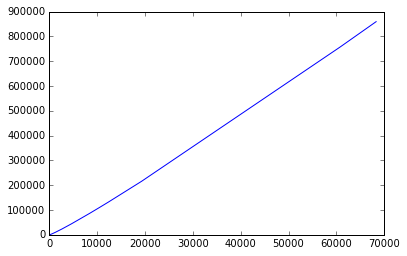

In [27]:
# x = x/ln(x)
plt.plot(df['mr_prime_power_prime_rank'], df['mr_prime_power'])

In [29]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(df['mr_prime_power_prime_rank'], df['mr_prime_power'])

In [30]:
slope

12.489775959806167

In [31]:
intercept

-4794.7431631951476

In [32]:
r_value

0.99931001446788914

In [33]:
std_err

0.08475275881370585

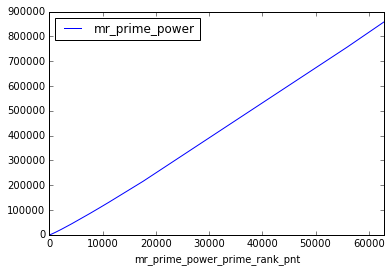

In [74]:
# prime "rank"
df.plot('mr_prime_power_prime_rank_pnt', 'mr_prime_power')

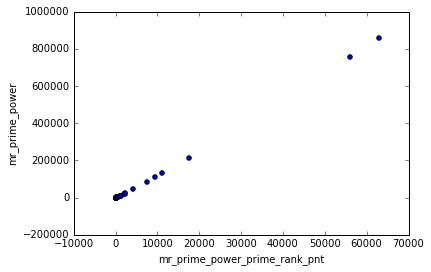

In [75]:
df.plot('mr_prime_power_prime_rank_pnt', 'mr_prime_power', kind='scatter')

In [38]:
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(df['mr_prime_power_prime_rank_pnt'], df['mr_prime_power'])

In [39]:
slope2

13.570518861162688

In [40]:
p_value

1.8023697217825412e-44

In [50]:
np.insert(np.diff(powers),0,0)

array([     0,      1,      2,      2,      6,      6,     12,     30,
           28,     18,     20,    394,     86,    672,    924,     78,
          936,   1036,    170,   5266,    252,   1272,   8724,   1764,
         1508,  21288,  41746,  24260,  21546,  84042, 540748, 102594])

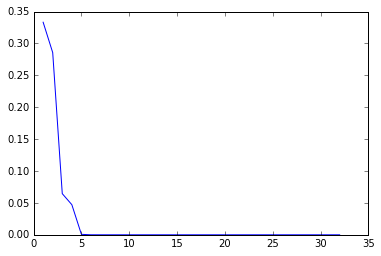

In [59]:
plt.plot(df['mr_prime_rank'], df['mr_prime_power_prime_distance']/((2**df['mr_prime_power'])-1))

In [60]:
df['mr_prime_power_prime_distance']/((2**df['mr_prime_power'])-1)

0     3.333333e-01
1     2.857143e-01
2     6.451613e-02
3     4.724409e-02
4     7.325113e-04
5     2.288823e-05
6     1.396984e-08
7     1.214306e-17
8     1.951564e-18
9     2.168404e-18
10    4.271757e-17
11    9.324139e-18
12    7.285839e-17
13    1.001803e-16
14    8.456777e-18
15    1.014813e-16
16    1.123233e-16
17    1.843144e-17
18    5.709409e-16
19    2.732189e-17
20    1.379105e-16
21    9.458580e-16
22    1.912533e-16
23    1.634977e-16
24    2.308050e-15
25    4.526110e-15
26    2.630274e-15
27    2.336022e-15
28    9.111852e-15
29    5.862802e-14
30    1.112326e-14
31    0.000000e+00
dtype: float64

In [56]:
((2**df['mr_prime_power'])-1)

0                       3
1                       7
2                      31
3                     127
4                    8191
5                  524287
6              2147483647
7     2305843009213693951
8     9223372036854775807
9     9223372036854775807
10    9223372036854775807
11    9223372036854775807
12    9223372036854775807
13    9223372036854775807
14    9223372036854775807
15    9223372036854775807
16    9223372036854775807
17    9223372036854775807
18    9223372036854775807
19    9223372036854775807
20    9223372036854775807
21    9223372036854775807
22    9223372036854775807
23    9223372036854775807
24    9223372036854775807
25    9223372036854775807
26    9223372036854775807
27    9223372036854775807
28    9223372036854775807
29    9223372036854775807
30    9223372036854775807
31    9223372036854775807
Name: mr_prime_power, dtype: int64

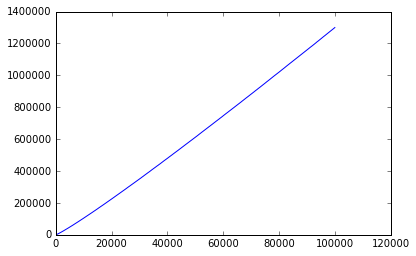

In [77]:
plt.plot([ix for ix,x in enumerate(primes)], primes)

In [78]:
stats.linregress([ix for ix,x in enumerate(primes)], primes)

LinregressResult(slope=13.180363125357841, intercept=-36403.130281411344, rvalue=0.99962224672792177, pvalue=0.0, stderr=0.001145925889782452)

In [80]:
df.plot(df['mr_prime_rank'], ((2**df['mr_prime_power'])-1))

IndexError: indices are out-of-bounds

In [81]:
((2**df['mr_prime_power'])-1)

0                       3
1                       7
2                      31
3                     127
4                    8191
5                  524287
6              2147483647
7     2305843009213693951
8     9223372036854775807
9     9223372036854775807
10    9223372036854775807
11    9223372036854775807
12    9223372036854775807
13    9223372036854775807
14    9223372036854775807
15    9223372036854775807
16    9223372036854775807
17    9223372036854775807
18    9223372036854775807
19    9223372036854775807
20    9223372036854775807
21    9223372036854775807
22    9223372036854775807
23    9223372036854775807
24    9223372036854775807
25    9223372036854775807
26    9223372036854775807
27    9223372036854775807
28    9223372036854775807
29    9223372036854775807
30    9223372036854775807
31    9223372036854775807
Name: mr_prime_power, dtype: int64

In [82]:
[2**x for x in df['mr_prime_power']]

[4,
 8,
 32,
 128,
 8192,
 524288,
 2147483648,
 2305843009213693952,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]